# Sales Prediction Using Python

__Importing Libraries__

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

__Loading Dataset__

In [4]:
df = pd.read_csv("Advertising.csv")

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [13]:
df = df.drop(columns=['Unnamed: 0'])

In [14]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


__Analysis__

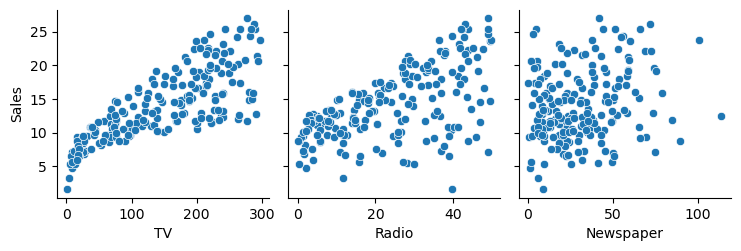

In [15]:
sns.pairplot(df,x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales',kind='scatter')

Through this pair plot observation one can conclude that as the advertisement increases the sales for TV also increases but data for Radio and Newspaper is unpredictable

<Axes: >

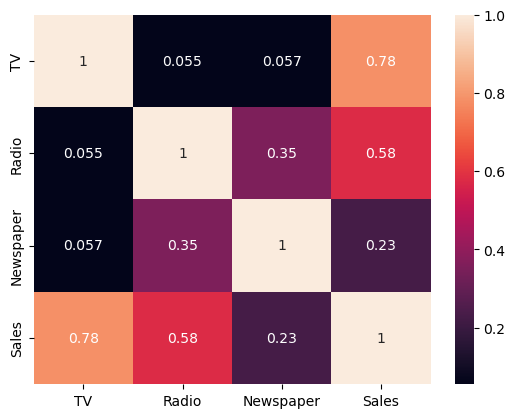

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
x=df[['TV']]
y=df['Sales']

__Splitting the data__

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [19]:
x_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [20]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

__Model Selection__

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

__Prediction__

In [22]:
# Predict on the test data
y_pred = model.predict(x_test)

print(y_pred[:5])  # Predicted values (first 5)
print(y_test[:5])  # Actual values (first 5)


[ 7.35234526 18.06533671 13.27610876 17.11214086 18.22807747]
126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64


__Evaluating__

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 7.97579853285485
R-squared: 0.5942987267783302


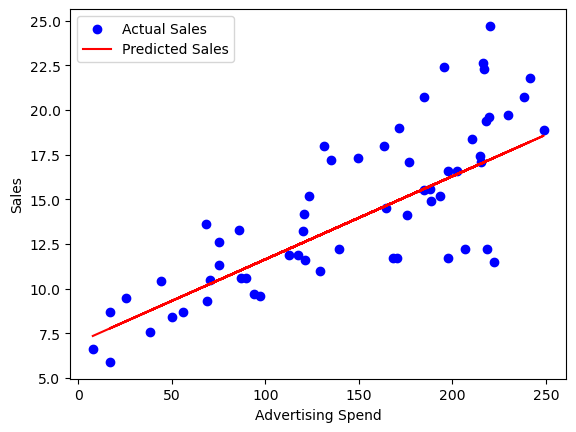

In [24]:
plt.scatter(x_test, y_test, color='blue', label='Actual Sales')
plt.plot(x_test, y_pred, color='red', label='Predicted Sales')
plt.xlabel('Advertising Spend')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [25]:
import statsmodels.api as sm

In [26]:
# Add a constant to the model (intercept)
x = sm.add_constant(x)

In [27]:
model = sm.OLS(y, x)
results = model.fit()

In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           1.47e-42
Time:                        18:35:25   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [30]:
y_pred = results.predict(x)

print("Predicted Sales:", y_pred.head())


Predicted Sales: 0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64


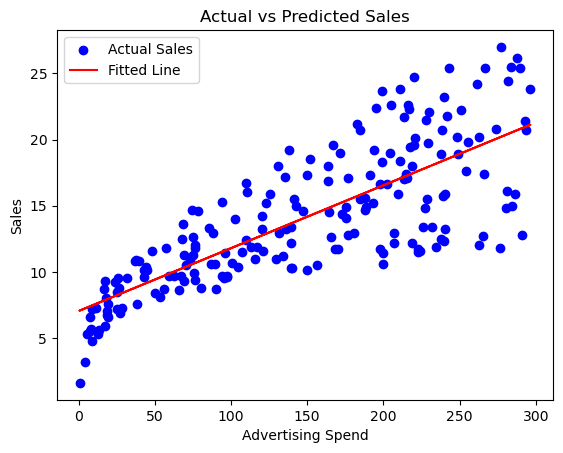

In [32]:
plt.scatter(df['TV'], y, color='blue', label='Actual Sales')
plt.plot(df['TV'], y_pred, color='red', label='Fitted Line')
plt.xlabel('Advertising Spend')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()
